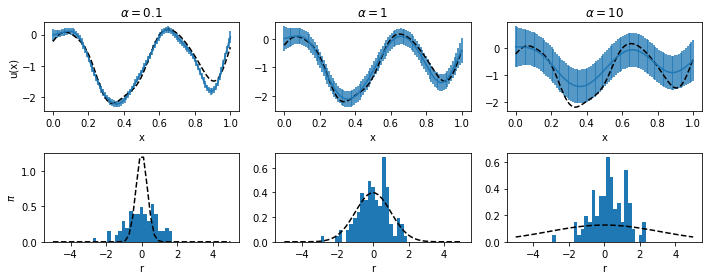

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import dia_matrix

# set random seed
np.random.seed(3)

# parameters
n = 100
sigma = 1
L = .01
alpha = [.1, 1, 10]

# grid
x = np.linspace(0,1,n)
x1,x2 = np.meshgrid(x,x)

# ground-truth and data
Sigma = np.exp(-np.abs(x1-x2)**2/(2*L))
u = np.random.multivariate_normal(np.zeros(n),Sigma)
f_delta = u + sigma*np.random.randn(n)

u_map = [0,0,0]
Sigma_map = [0,0,0]

for k in range(3):
    # MAP-estimate
    u_map[k] = np.linalg.solve(alpha[k]*np.eye(n) + Sigma,Sigma@f_delta)

    # covariance
    Sigma_map[k] = alpha[k]*np.linalg.inv(Sigma + alpha[k]*np.eye(n))@Sigma

#plot
r = np.linspace(-5,5,50)
fig, ax = plt.subplots(2,3)

for k in range(3):
    ax[0,k].plot(x,u,'k--',label='ground truth')
    ax[0,k].errorbar(x,u_map[k],yerr=np.sqrt(np.diag(Sigma_map[k])))
    ax[0,k].set_xlabel('x')
    ax[0,0].set_ylabel('u(x)')
    ax[0,k].set_title(r'$\alpha = $'+str(alpha[k]))
    
    ax[1,k].hist(u_map[k]-f_delta,bins=r,density=True)
    ax[1,k].plot(r,(1/np.sqrt(2*np.pi*alpha[k]))*np.exp(-(0.5/alpha[k])*r**2),'k--')
    ax[1,k].set_xlabel('r')
    ax[1,0].set_ylabel(r'$\pi$')
    
fig.set_figwidth(10)
fig.tight_layout()
plt.show()